# Week 3: Python and Pandas

## Setup

To create a virtual environment and install the necessary packages, you can follow these steps

### 1. **Create a Virtual Environment**

A virtual environment is an isolated environment where you can install packages without affecting your global Python installation. You can create a virtual environment using `venv` (which is included in standard Python installations).

Here is how to create a virtual environment. In your terminal, navigate to your project directory and run:


In [ ]:
python3 -m venv .venv

This will create a new directory named `.venv` in your project directory.

### 2. **Activate the Virtual Environment**

Before you can use the virtual environment, you need to activate it. The command to activate the virtual environment depends on your operating system

#### On macOS and Linux

In [ ]:
source venv/bin/activate

#### On Windows

In [ ]:
.\venv\Scripts\activate

Once the virtual environment is activated, your terminal prompt will change to show the name of the virtual environment.

Any packages you install while the virtual environment is activated will be installed in the virtual environment, not in your global Python installation.

### 3. **Install Packages**

Now, you can install the necessary packages using `pip`.

In [ ]:
pip install pandas numpy matplotlib seaborn scipy statsmodels nltk sklearn textblob pyLDAvis json base64 worldcloud scikit-learn

### 4. **Save Requirements**

If you want to save the list of packages and their versions to a file (so you can install them later or on another machine), you can use `pip freeze`

In [ ]:
pip freeze > requirements.txt

This will create a file named `requirements.txt` with a list of the installed packages and their versions.

In the future, if you want to install the packages from the `requirements.txt` file, you can run

In [ ]:
pip install -r requirements.txt

### 5. **Deactivate the Virtual Environment**

When you're done using the virtual environment, you can deactivate it:

In [ ]:
#deactivate

This will return you to your global Python environment.


---

# Pandas


Before we begin, let's understand the structure of the data we are dealing with. First, we'll import the necessary libraries and load the data. Then, we'll take a quick look at the first few rows of the data and its overall structure.


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from textblob import TextBlob
import pyLDAvis
import pyLDAvis.sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
# Load the data
data = pd.read_csv("D:/tryhackme_urls.csv")

# Display the first few rows of the data
print(data.head())

# Display the information of the data
print(data.info())

## Part 1: Data Cleaning

In this section, we will perform data cleaning. This may involve:

1. Checking for missing values and deciding what to do with them (i.e., fill them with some value, drop them, etc.).
2. Checking for duplicate values and deciding what to do with them.
3. Checking if the data types of each column make sense and converting them if necessary.
4. Checking for any inconsistencies in the data (e.g., values that don't make sense in the context of the data).

```python
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Check the data types of each column
print(data.dtypes)
```


In [ ]:
# Drop columns with all missing values
data_cleaned = data.dropna(axis=1, how="all")

# Convert 'Time' column to datetime
data_cleaned["Time"] = pd.to_datetime(data_cleaned["Time"])

# Display the first few decoded responses
print(data_cleaned["Response"].head())

In [ ]:
# Decode 'Response' column from Base64
data_cleaned["Response"] = data_cleaned["Response"].apply(
    lambda x: base64.b64decode(x).decode("utf-8")
)

# Remove HTTP headers from 'Response' column
data_cleaned["Response"] = data_cleaned["Response"].apply(
    lambda x: x.split("\r\n\r\n", 1)[1]
)

The output will guide the next steps. For example, if there are missing values, we might choose to fill them with the median or mode of the column, or drop them if they are not significant. If there are duplicates, we might want to drop them to avoid redundancy. If some columns are not of the expected data type, we might want to convert them.


## Part 2: Data Sorting

In this section, we will sort the data based on certain criteria. This can help in understanding the data better and making specific analyses easier. We will use the `sort_values()` function from pandas.

```python
# Sort the data based on a column
# Replace 'column_name' with the column you want to sort by
data_sorted = data.sort_values('column_name')

# Display the first few rows of the sorted data
print(data_sorted.head())
```


In [ ]:
# Sort data by 'Time'
data_sorted = data_cleaned.sort_values("Time")

# Part 3: Data Analysis

In this section, we will analyze the data to gain insights. This can involve computing descriptive statistics, performing aggregations, and making comparisons. The exact analysis will depend on the context of the data and the questions we are trying to answer.

```python
# Compute descriptive statistics
print(data.describe())

# Perform aggregations
# Replace 'column_name1' and 'column_name2' with the columns you want to aggregate by
aggregated_data = data.groupby('column_name1')['column_name2'].agg([np.mean, np.std])

# Display the aggregated data
print(aggregated_data)
```


In [13]:
# Parse 'Response' column into a new DataFrame
response_data = pd.json_normalize(data_cleaned["Response"].apply(json.loads))

# Extract 'rooms' data into a new DataFrame
rooms_list = response_data["rooms"].explode().tolist()
data = pd.json_normalize(rooms_list)

# Compute correlation between 'users' and 'upVotes'
correlation = data["users"].corr(data["upVotes"])
print(correlation)

0.9160619802980209


# Part 4: Data Presentation

Finally, in this section, we will create visualizations to present the data and our findings. We will use seaborn or matplotlib for this.


In [ ]:
# Create a histogram
# Replace 'column_name' with the column you want to plot
sns.histplot(data["column_name"])
plt.show()

# Create a bar plot
# Replace 'column_name1' and 'column_name2' with the columns you want to plot
sns.barplot(x="column_name1", y="column_name2", data=data)
plt.show()

This script performs the following steps:

1. Imports the necessary libraries.
2. Loads the data from the CSV file.
3. Cleans the data by dropping columns with all missing values, converting the 'Time' column to datetime, decoding the 'Response' column from Base64, and removing the HTTP headers from the 'Response' column.
4. Sorts the data by 'Time'.
5. Parses the 'Response' column into a new DataFrame and then extracts the 'rooms' data into another new DataFrame.
6. Computes the correlation between 'users' and 'upVotes' in the rooms data.
7. Creates a scatter plot of 'users' vs 'upVotes' to visualize the correlation.


## Part 5: More Visualizations


In [ ]:
# Set the theme for seaborn
sns.set_theme()

# 1. Histogram of 'difficulty'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="difficulty", palette="viridis")
plt.title("Distribution of Room Difficulties")
plt.show()

### 2. Bar Plot of `type`


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="type", palette="viridis")
plt.title("Frequency of Room Types")
plt.show()

### 3. Time Series Plot of `created`


In [ ]:
# First, convert 'created' to datetime
data["created"] = pd.to_datetime(data["created"])

plt.figure(figsize=(10, 6))
data.resample("M", on="created").size().plot()
plt.title("Number of Rooms Created Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Rooms")
plt.show()

### 4. Word Cloud of `tags`


In [ ]:
# Flatten the list of tags and convert to string
tags_str = " ".join([tag for sublist in data["tags"].tolist() for tag in sublist])

wordcloud = WordCloud(background_color="white").generate(tags_str)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 5. Correlation Heatmap


In [ ]:
numeric_cols = data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 6. Boxplot of 'upVotes' by 'difficulty'


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="difficulty", y="upVotes", palette="viridis")
plt.title("Distribution of UpVotes by Difficulty")
plt.show()

# Further Analysis


There are several more advanced analyses you can perform on this data, based on what questions you're trying to answer or what insights you're trying to glean. Here are a few ideas:

1. **Topic Modeling on `description`**: If you have a large number of rooms, you might want to automatically group them into topics based on their descriptions. You can do this using techniques like **Latent Dirichlet Allocation** (LDA) or Non-negative Matrix Factorization (NMF).
2. **Sentiment Analysis on** 'description': You could use a sentiment analysis model to assign a sentiment score to each room based on its description. This could give you an idea of how positively or negatively the room is described.
3. **Text Analysis on `tags`**: You could analyze the tags to find the most common ones, or find tags that often appear together.
4. **Time Series Analysis**: You could perform more advanced time series analysis on the 'created' column. For example, you could look for trends or seasonality, or forecast future room creation.
5. **Statistical Testing**: If you have hypotheses about the data, you could use statistical tests to test them. For example, you might hypothesize that certain types of rooms get more upvotes, and use a t-test to test this.
6. **Machine Learning**: You could use machine learning techniques to predict certain variables based on others. For example, you could predict the 'upVotes' based on 'users', 'difficulty', 'type', etc.
7. **Network Analysis**: If there's a connection between rooms (for example, if they're created by the same users or share tags), you could represent the rooms as a network and perform network analysis.


## 3a: Text Analysis on tags

1. Most Common Tags: We can use Python's collections.Counter to find the most common tags.
2. Tags That Often Appear Together: We can use itertools.combinations to find pairs of tags that often appear together.


In [14]:
from collections import Counter
from itertools import combinations

# Flatten the list of tags
tags = [tag for sublist in data["tags"].tolist() for tag in sublist]

# Compute the most common tags
tag_counter = Counter(tags)
most_common_tags = tag_counter.most_common(10)

# Compute pairs of tags that often appear together
tag_pairs_counter = Counter()
for tag_list in data["tags"]:
    tag_pairs_counter.update(combinations(tag_list, 2))
most_common_tag_pairs = tag_pairs_counter.most_common(10)

print(most_common_tags)
print(most_common_tag_pairs)


[('security', 322), ('linux', 79), ('web', 66), ('windows', 59), ('ctf', 35), ('enumeration', 35), ('privesc', 32), ('beginner', 28), ('challenge', 27), ('forensics', 24)]
[(('security', 'linux'), 31), (('security', 'web'), 28), (('security', 'windows'), 19), (('security', 'blue team'), 18), (('security', 'forensics'), 16), (('security', 'enumeration'), 14), (('web', 'linux'), 13), (('security', 'boot2root'), 12), (('security', 'aws'), 12), (('security', 'nmap'), 11)]


## 3b: Visualizing text analysis


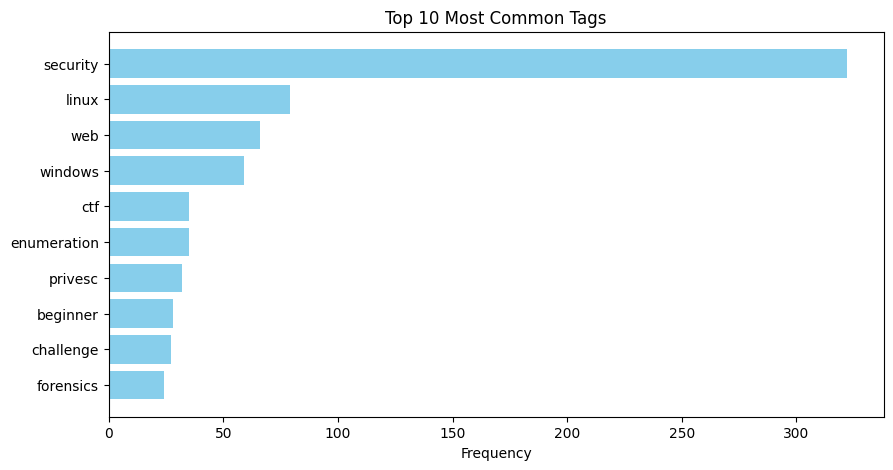

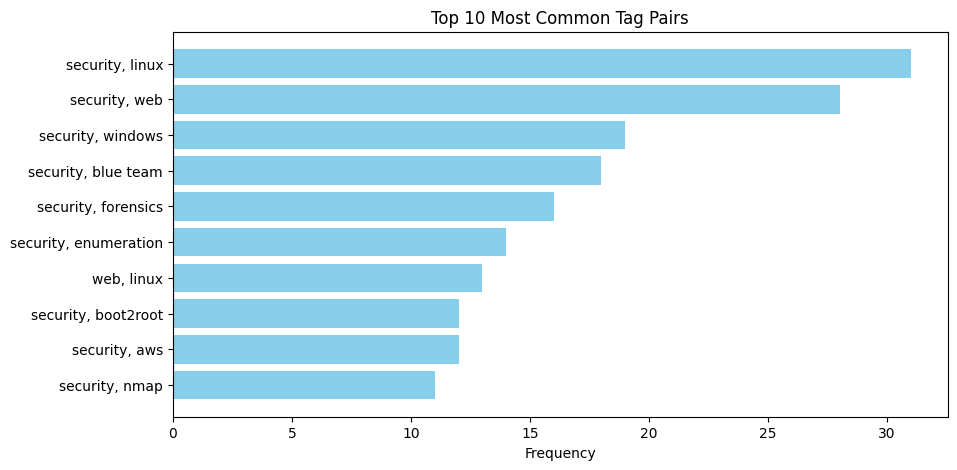

In [18]:
# Compute the most common tags
tag_counter = Counter(tags)
most_common_tags = dict(tag_counter.most_common(10))

# Plot the most common tags using matplotlib
plt.figure(figsize=(10, 5))
plt.barh(*zip(*enumerate(most_common_tags.values())), align="center", color="skyblue")
plt.yticks(*zip(*enumerate(most_common_tags.keys())))
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Tags")
plt.show()

# Compute pairs of tags that often appear together
tag_pairs_counter = Counter()
for tag_list in data["tags"]:
    tag_pairs_counter.update(combinations(tag_list, 2))
most_common_tag_pairs = dict(tag_pairs_counter.most_common(10))

# Plot the most common tag pairs using matplotlib
plt.figure(figsize=(10, 5))
plt.barh(
    *zip(*enumerate(most_common_tag_pairs.values())), align="center", color="skyblue"
)
plt.yticks(*zip(*enumerate([", ".join(pair) for pair in most_common_tag_pairs.keys()])))
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Tag Pairs")
plt.show()


#### Seaborn


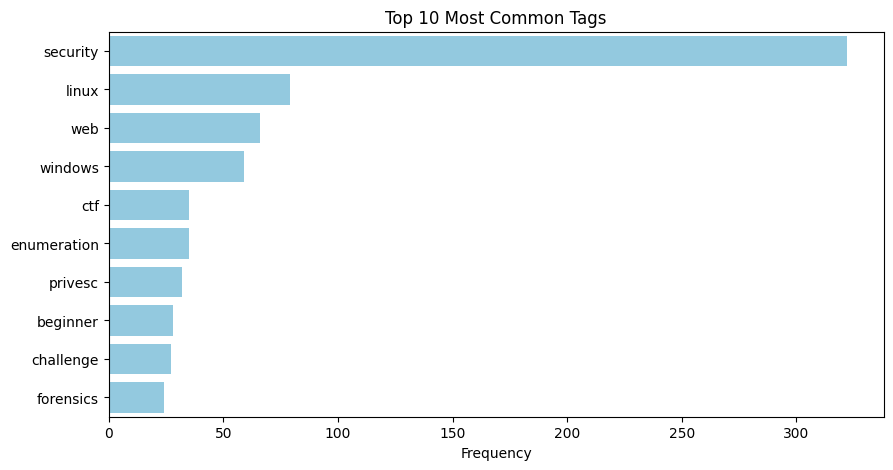

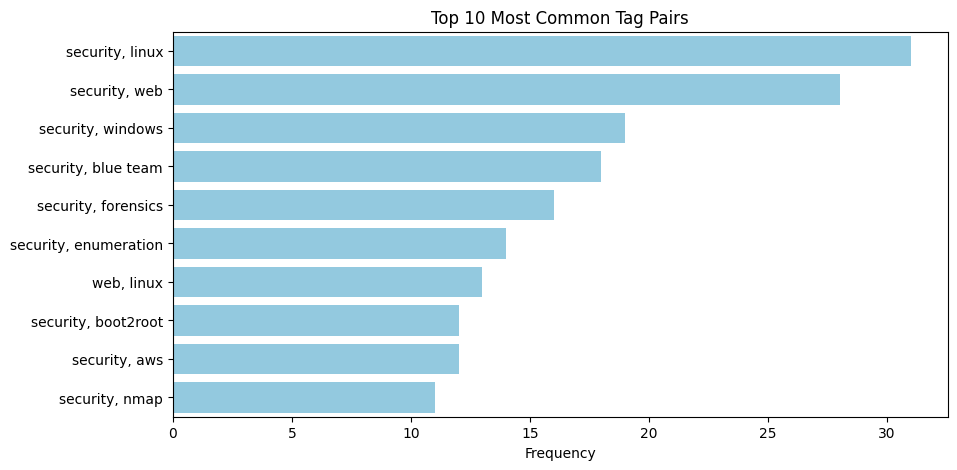

In [17]:
# Plot the most common tags using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(most_common_tags.values()), y=list(most_common_tags.keys()), color="skyblue"
)
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Tags")
plt.show()

# Plot the most common tag pairs using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(most_common_tag_pairs.values()),
    y=[", ".join(pair) for pair in most_common_tag_pairs.keys()],
    color="skyblue",
)
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Tag Pairs")
plt.show()


## 4: Time Series Analysis

Let's start by converting the 'created' column to datetime format and setting it as the DataFrame's index, which is a common practice in time series analysis

In [ ]:
# Convert 'created' to datetime and set as index
data['created'] = pd.to_datetime(data['created'])
data.set_index('created', inplace=True)


Once we have a datetime index, we can resample the data at different frequencies.

For example, we can resample the data monthly and compute the number of rooms created each month

In [ ]:
# Resample the data monthly and compute the number of rooms created each month
monthly_rooms = data.resample('M').size()

# Plot the number of rooms created over time
monthly_rooms.plot(figsize=(10, 6))
plt.title('Number of Rooms Created Over Time (Monthly)')
plt.ylabel('Number of Rooms')
plt.show()


We can also look for trends or seasonality in the number of rooms created over time. This could be done using decomposition methods like the one provided by the `statsmodels` library

This will generate a plot with four subplots

1. `observed` (the original time series)
2. `trend` (the trend component)
3. `seasonal` (the seasonal component)
4. `residual` (the residual component)

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(monthly_rooms)

# Plot the decomposed time series
decomposition.plot()
plt.show()


## Topic Modeling

Background: Topic modeling is a type of statistical modeling for discovering the abstract "topics" that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

### LDA for topic modeling in Python

### 1. **Data Cleaning**

To prepare the data, we need to clean it first. 
This involves:
- removing punctuation
- lowercasing the words
- removing stopwords
  - common words that don't carry much information
  - EX: '`the`', '`a`', '`in`', etc. (all articles)

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\|', ' ', text)  # Replace | with space
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with one space
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove words with 2 or fewer letters
    text = re.sub(r'[^a-z ]', '', text)  # Remove anything that's not a letter or a space
    return text

# Clean the 'description' column
data['description_clean'] = data['description'].apply(clean_text)


### 2. **Feature Extraction**

Next, we transform the text into a form that can be used in our LDA model. We'll use `CountVectorizer` from `sklearn` to create a document-term matrix. We'll exclude common English stop words as they do not provide any valuable information about the topics.

In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit and transform the cleaned descriptions
X = vectorizer.fit_transform(data['description_clean'])

# Get the feature names (words)
words = vectorizer.get_feature_names_out()


### 3. **Model Training**

We'll use `LatentDirichletAllocation` from `sklearn` to perform the LDA. 

In [ ]:
# Number of topics
n_topics = 10

# Initialize LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)

# Fit the model
lda.fit(X)


### 4. **Inspect Topics**

Finally, we'll print out the top words for each topic to get an idea of what each topic represents.

In [ ]:
# Function to print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

# Print the top words for each topic
print_top_words(lda, words, 10)


### 1. **TF-IDF Instead of Raw Counts**

TF-IDF stands for "**Term Frequency-Inverse Document Frequency**". It's a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents. If a word appears frequently in a document, it's important. If a word appears in many documents, it's not a unique identifier, so it's not that important. So, the importance increases with the number of times a word appears in a document and decreases with the number of documents that contain the word. Here's how to use it:

In [ ]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the cleaned descriptions
X = vectorizer.fit_transform(data['description_clean'])

# Get the feature names (words)
words = vectorizer.get_feature_names_out()


### 2. **Different Numbers of Topics**

The number of topics you choose for LDA is somewhat arbitrary and depends on your specific use case. A good way to choose the number of topics is to fit LDA with different numbers of topics and see which one gives the highest log-likelihood or other metric of fit. You could do this in a loop or grid search.

### 3. **More Advanced Cleaning and Tokenization**

NLTK and SpaCy are two libraries that provide more advanced options for cleaning and tokenization. For example, you could `lemmatize` the words (reduce them to their root form), remove proper nouns, or use a custom list of stopwords.

### 4. **Using n-grams**

n-grams are contiguous sequences of n words. For example, in the sentence "I love data science", the 2-grams (or "bigrams") are "I love", "love data", and "data science". Using n-grams instead of individual words can sometimes improve the performance of a text model, because it can capture phrases that have a specific meaning.

In [ ]:
# Initialize TfidfVectorizer with n-grams
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))

# Fit and transform the cleaned descriptions
X = vectorizer.fit_transform(data['description_clean'])

# Get the feature names (words)
words = vectorizer.get_feature_names_out()


### 5. **Visualizing the topics**

One common way to visualize topics from `LDA` is using a package called `pyLDAvis`

In [ ]:
# Prepare the LDAvis visualization
vis = pyLDAvis.sklearn.prepare(lda, X, vectorizer)

# Show the visualization
pyLDAvis.show(vis)


This will create an interactive visualization where each bubble represents a topic. The size of the bubble represents the prevalence of the topic, and the distance between bubbles represents the similarity between topics.


## Sentiment Analysis

Sentiment analysis, or opinion mining, is a sub-field of Natural Language Processing (NLP) that tries to identify and extract opinions within a given text. The aim is to determine the attitude of a speaker, writer, or other subject with respect to some topic or the overall contextual polarity of a document.

There are several Python libraries that can be used to perform sentiment analysis, such as TextBlob, Vader, etc. 

#### example using TextBlob.

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing tasks such as part-of-speech tagging, noun phrase extraction, and sentiment analysis.

First, let's install TextBlob

In [ ]:
%pip install textblob

Then, we can use TextBlob's `sentiment` property to get the polarity of each description.
The polarity score is a float within the range `[-1.0, 1.0]` where a score:

- `< 0` is a negative sentiment
- `> 0` is a positive sentiment
- `0` is neutral

In [ ]:
# Get the polarity of each description
data['sentiment'] = data['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the average sentiment
print(data['sentiment'].mean())


This will give you the average sentiment of all the room descriptions. If you want to analyze the sentiment further, you could look at the distribution of the sentiment scores or compare the sentiment across different types of rooms.

**NOTE**: sentiment analysis can be complex and depends on many factors, such as the language and context of the text. These results should be used as an initial analysis and not the final conclusion.

---


We can expand on the sentiment analysis by looking at the distribution of sentiment scores and comparing sentiment across different types of rooms.

### 1. **Distribution of Sentiment Scores**: We can use a histogram to visualize the distribution of sentiment scores.

In [ ]:
# Plot a histogram of the sentiment scores
plt.hist(data['sentiment'], bins=20, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

This will give you an idea of how positive or negative the room descriptions are overall.

### 2. **Sentiment by Room Type**

We can group the data by room type and compute the average sentiment score for each type.

In [ ]:
# Compute average sentiment by room type
sentiment_by_type = data.groupby('type')['sentiment'].mean()

# Plot average sentiment by room type
sentiment_by_type.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Sentiment')
plt.show()


This will show you if certain types of rooms have more positive or negative descriptions than others.

These are just a couple of ways you can analyze the sentiment data. Depending on your specific goals, there may be other analyses that would be useful as well.

## Statistical Tests

### 1. **Chi-Square Test of Independence**

This test is used to determine if there is a significant association between two categorical variables. For this, we need two categorical variables. Let's use '`type`' and '`difficulty`' for this test.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['type'], data['difficulty'])

# Perform the Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('p-value:', p_value)


A `p-value` less than `0.05` indicates that there is a significant association between the two variables.

### 2. **Regression Analysis**

Regression analysis is used to understand the relationship between a *dependent* variable and one or more *independent* variables. For this, we need numeric variables. Let's use '`upVotes`' as the dependent variable and '`users`' as the independent variable.


In [ ]:
import statsmodels.api as sm

# Add a constant to the independent variable
X = sm.add_constant(data['users'])

# Define the dependent variable
y = data['upVotes']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics of the regression model
print(results.summary())


The coefficient for '`users`' tells you how much '`upVotes`' changes for each one-unit increase in '`users`', assuming all other variables are held constant.

The *p-value* for '`users`' tells you whether this coefficient is statistically significant. 

A *p-value* *less than* `0.05` indicates that '`users`' is a **significant** predictor of '`upVotes`'.



[NOTE][^1]


[^1]: **NOTE**: the regression analysis assumes that the residuals (the difference between the observed and predicted values) are normally distributed and have constant variance, and that there is no multicollinearity (high correlation between independent variables). It would be good to check these assumptions if you are using regression analysis for inferential purposes.